![Blood_image.png](attachment:Blood_image.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\prasa'

In [3]:
data=pd.read_csv("Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv")
data

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0
...,...,...,...,...,...,...
571,698,23,1,250,23,0
572,433,16,3,750,86,0
573,360,21,2,500,52,0
574,541,39,1,250,39,0


In [4]:
data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [5]:
data.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [7]:
data.count()

Unnamed: 0                     576
Months since Last Donation     576
Number of Donations            576
Total Volume Donated (c.c.)    576
Months since First Donation    576
Made Donation in March 2007    576
dtype: int64

In [8]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [9]:
data.isnull().sum(axis=0)

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

### Outlier_Detection ###

In [10]:
data.columns

Index(['Unnamed: 0', 'Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [11]:
from collections import Counter

# Outlier detection 
def detect_outliers(data,n,features):

    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   


Outliers_to_drop = detect_outliers(data,2,['Months since Last Donation','Number of Donations','Total Volume Donated (c.c.)','Months since First Donation'])

In [12]:
data.loc[Outliers_to_drop]

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007


There is no outlier in this data

### Feature Analysis ###

In [13]:
# Correlation matrix between numerical values

<Axes: >

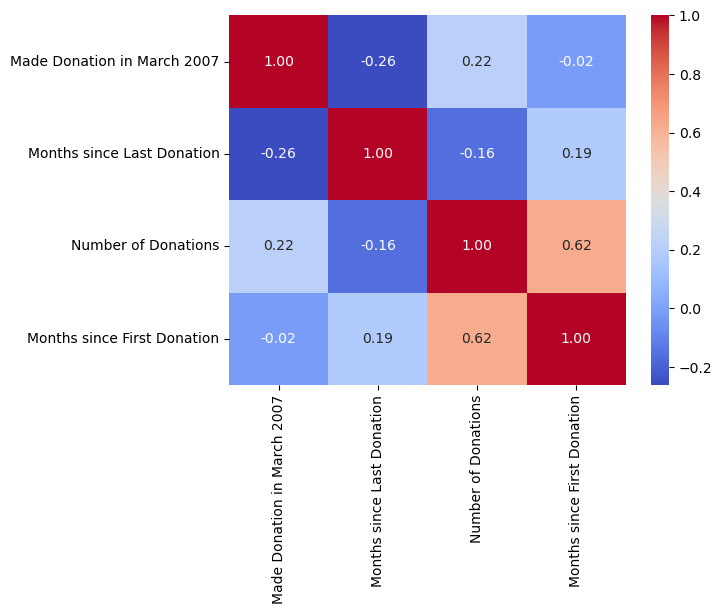

In [14]:
sns.heatmap(data[['Made Donation in March 2007','Months since Last Donation','Number of Donations','Months since First Donation']].corr(),annot=True,fmt='.2f',cmap='coolwarm')

In [15]:
# Only months_since_first_donation seems to have a significative correlation with the target probability.

C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


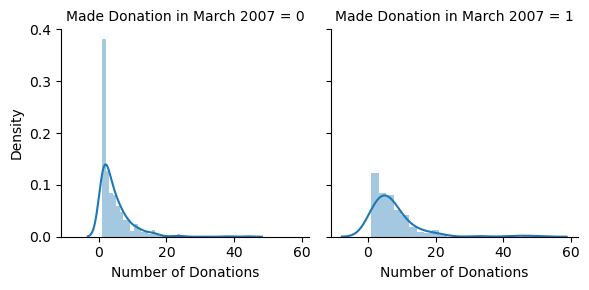

In [16]:
d=sns.FacetGrid(data,col='Made Donation in March 2007')
d.map(sns.distplot,'Number of Donations')

C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


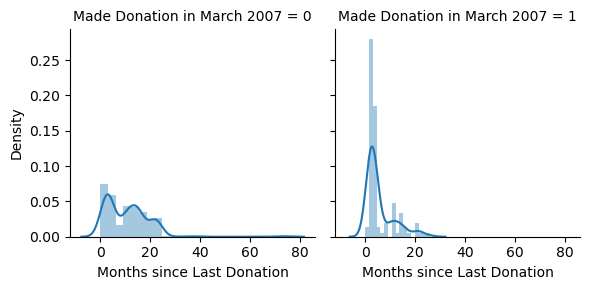

In [17]:
d=sns.FacetGrid(data,col='Made Donation in March 2007')
d.map(sns.distplot,'Months since Last Donation')

C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


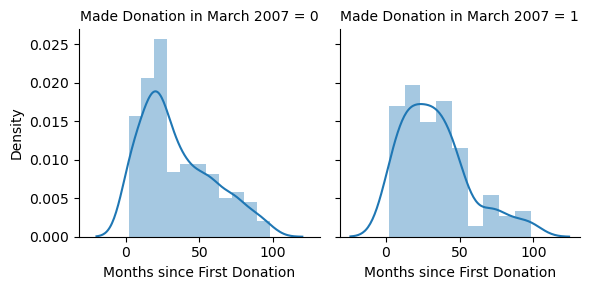

In [18]:
d=sns.FacetGrid(data,col='Made Donation in March 2007')
d.map(sns.distplot,'Months since First Donation')

C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


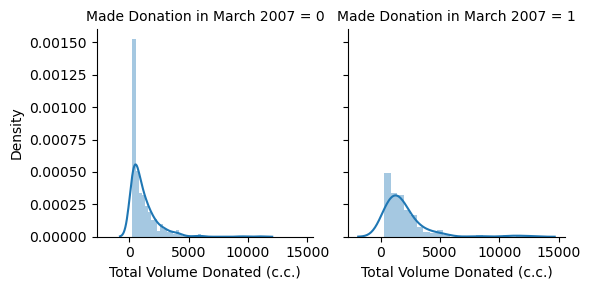

In [19]:
d=sns.FacetGrid(data,col='Made Donation in March 2007')
d.map(sns.distplot,'Total Volume Donated (c.c.)')

In [20]:
# Volume donated is also a good feature to know wether the donor will donate or not.

<Figure size 2000x1000 with 0 Axes>

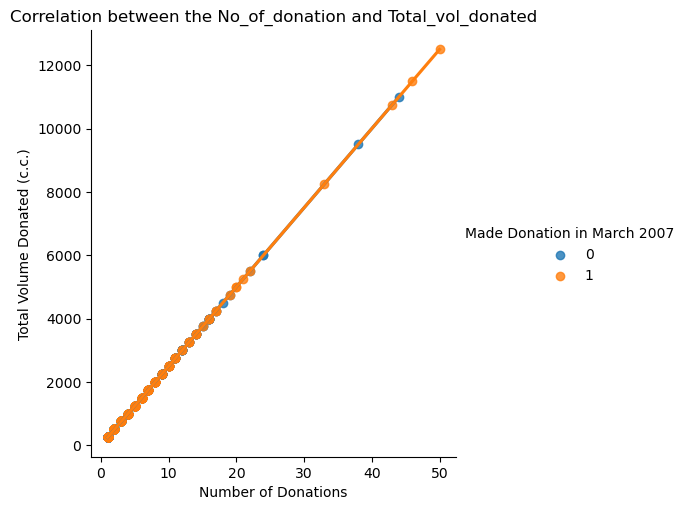

In [21]:
plt.figure(figsize=(20,10))
sns.lmplot(x='Number of Donations',y='Total Volume Donated (c.c.)',hue='Made Donation in March 2007',data=data)
plt.title("Correlation between the No_of_donation and Total_vol_donated")
plt.show()

In [22]:
# From the graph we can see that Number of donations and total volume donated values are highly correlated. So we can use only the total volume donated c.c.

In [23]:
# we do not require a id column so we are going to drop the column
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [24]:
# removed Id column
data

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


# Model Creation #

In [25]:
# Creating Training and Testing data
from sklearn.model_selection import train_test_split

In [26]:
X=data.drop(columns=['Made Donation in March 2007'])
X.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [27]:
y=data['Made Donation in March 2007']
y.value_counts()

Made Donation in March 2007
0    438
1    138
Name: count, dtype: int64

In [28]:
# Split the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2,random_state= 45)

In [29]:
# Copying the splitted train and test datasets to the new variable for log normalization.
X_train_normalization, X_test_normalization = X_train.copy(), X_test.copy()
col_to_normalize = 'Total Volume Donated (c.c.)'
# Log normalization
for data_ in [X_train_normalization, X_test_normalization]:
    data_['Volume_donated'] = np.log(data_[col_to_normalize])
    data_.drop(columns=col_to_normalize, inplace=True)
X_train_normalization.var()

Months since Last Donation      71.788936
Number of Donations             31.807952
Months since First Donation    549.552164
Volume_donated                   0.773278
dtype: float64

In [30]:
# Logisitic Regression
from sklearn.linear_model import LogisticRegression
d=LogisticRegression()
d.fit(X_train_normalization,y_train) #Training
y_pred=d.predict(X_test_normalization)
from sklearn.metrics import accuracy_score,classification_report
auc=accuracy_score(y_test,y_pred)
print('LogisticRegression Accuracy Score: {:.3f}'.format(auc))
print(classification_report(y_test,y_pred))

LogisticRegression Accuracy Score: 0.767
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        88
           1       0.56      0.18      0.27        28

    accuracy                           0.77       116
   macro avg       0.67      0.57      0.57       116
weighted avg       0.73      0.77      0.72       116



In [31]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train_normalization,y_train)
rfc_pred=rfc.predict(X_test_normalization)
rf_auc=accuracy_score(y_test,rfc_pred)
print("RandomForestClassifier Accuracy Score: {:.3f}".format(rf_auc))

# Classification report for Random Forest Classifier
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

RandomForestClassifier Accuracy Score: 0.707
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        88
           1       0.33      0.21      0.26        28

    accuracy                           0.71       116
   macro avg       0.55      0.54      0.54       116
weighted avg       0.67      0.71      0.68       116



In [32]:
# XG Boosting 
from xgboost import XGBClassifier
xg=XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xg.fit(X_train_normalization,y_train)
xg_pred=xg.predict(X_test_normalization)
xg_auc=accuracy_score(y_test,xg_pred)
print("XGBoosting Accuracy Score: {:.3f}".format(xg_auc))

#Classification report for XGBoosting
from sklearn.metrics import classification_report
print(classification_report(y_test,xg_pred))

XGBoosting Accuracy Score: 0.690
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        88
           1       0.30      0.21      0.25        28

    accuracy                           0.69       116
   macro avg       0.54      0.53      0.53       116
weighted avg       0.66      0.69      0.67       116



C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [33]:
data.columns

Index(['Months since Last Donation', 'Number of Donations',
       'Total Volume Donated (c.c.)', 'Months since First Donation',
       'Made Donation in March 2007'],
      dtype='object')

In [34]:
# Split the training and testing data for smote
from imblearn.over_sampling import SMOTE
X=data.drop(columns="Made Donation in March 2007")
y=data["Made Donation in March 2007"]
sm=SMOTE(random_state=45)
X_smote,y_smote=sm.fit_resample(X,y)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=45)

In [36]:
print(f"Training Data size: {X_train.shape}, Testing Data size: {X_test.shape}")

Training Data size: (700, 4), Testing Data size: (176, 4)


In [37]:
#Logisitic regression accuracy score for applied smote technique
s=LogisticRegression()
s.fit(X_train,y_train)
lr_pred=s.predict(X_test)
AUC=accuracy_score(y_test,lr_pred)
print("LogisiticRegressionSmote Accuracy score: {:.3f}".format(AUC))

# Classification report for logisitc regression applied smote technique
print(classification_report(y_test,lr_pred))

LogisiticRegressionSmote Accuracy score: 0.699
              precision    recall  f1-score   support

           0       0.74      0.63      0.68        89
           1       0.67      0.77      0.72        87

    accuracy                           0.70       176
   macro avg       0.70      0.70      0.70       176
weighted avg       0.70      0.70      0.70       176



In [38]:
##Random Forest Classifier accuracy score for applied smote technique
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_auc=accuracy_score(y_test,rf_pred)
print("RandomForestClassifier accuracy score: {:.3f}".format(rf_auc))
#Classification report for random forest classifier applied smote technique
print(classification_report(y_test,rf_pred))

RandomForestClassifier accuracy score: 0.761
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        89
           1       0.77      0.74      0.75        87

    accuracy                           0.76       176
   macro avg       0.76      0.76      0.76       176
weighted avg       0.76      0.76      0.76       176



In [39]:
# XGBoosting classifier accuracy score for applied smote technique
xgb=XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=45)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
xgb_auc=accuracy_score(y_test,xgb_pred)
print("XGBoosting Smote Accuracy Score: {:.3f}".format(xgb_auc))
#Classification report for XGBoosting for applied smote technique
print(classification_report(y_test,xgb_pred))

XGBoosting Smote Accuracy Score: 0.790
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        89
           1       0.81      0.75      0.78        87

    accuracy                           0.79       176
   macro avg       0.79      0.79      0.79       176
weighted avg       0.79      0.79      0.79       176



C:\Users\prasa\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:13:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc_train=sc.fit_transform(X_train)
sc_test=sc.transform(X_test)
x_train_sc = pd.DataFrame(sc_train, columns = X_train.columns)
x_test_sc = pd.DataFrame(sc_test, columns = X_test.columns)


#Create and train the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=45) 
rfr.fit(x_train_sc, y_train)

#Make predictions on the test set
y_pred = rfr.predict(x_test_sc)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5 #Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.5f}".format(mse))
print("Root Mean Squared Error: {:.5f}".format(rmse))
print("R-squared: {:.5f}".format(r2))



#Hyperparameter Tuning using GridSearchCV or RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs = -1)
grid_search.fit(x_train_sc, y_train)

best_rf_model = grid_search.best_estimator_

y_pred_tuned = best_rf_model.predict(x_test_sc)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = mse_tuned**0.5
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Mean Squared Error: {:.5f}".format(mse_tuned))
print("Tuned Root Mean Squared Error: {:.5f}".format(rmse_tuned))
print("Tuned R-squared: {:.5f}".format(r2_tuned))


Mean Squared Error: 0.18405
Root Mean Squared Error: 0.42901
R-squared: 0.26372
Tuned Mean Squared Error: 0.18115
Tuned Root Mean Squared Error: 0.42561
Tuned R-squared: 0.27533


In [45]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
train_sc=sc.fit_transform(X_train)
test_sc=sc.transform(X_test)

X_train_sc=pd.DataFrame(train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(test_sc,columns=X_test.columns)

gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=45)
gbr.fit(X_train_sc,y_train)
gbr_pred=gbr.predict(X_test_sc)


# Evaluation Metrics
mse=mean_squared_error(y_test,gbr_pred)
rmse=mse**0.5
r2=r2_score(y_test,gbr_pred)

print("Mean Squared Error: {:.5f}".format(mse))
print("Root Mean Squared Error: {:.5f}".format(rmse))
print("r2_score: {:.5f}".format(r2))


#Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[50,100,200],
            'learning_rate':[0.01,0.1,0.5],
            'max_depth':[3,5,7],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4]
}


gsc=GridSearchCV(estimator=gbr,param_grid=param_grid,cv=3,scoring='neg_mean_squared_error',n_jobs=-1)
gsc.fit(X_train_sc,y_train)
gsc_best_model=grid_search.best_estimator_
gsc_pred_tuned=gsc_best_model.predict(X_test_sc)
mse_tuned=mean_squared_error(y_test,gsc_pred_tuned)
rmse_tuned=mse**0.5
r2_tuned=r2_score(y_test,gsc_pred_tuned)


print("Tuned Mean Squared Error: {:.5f}".format(mse_tuned))
print("Tuned Root Mean Squared Error: {:.5f}".format(rmse_tuned))
print("Tuned R-squared: {:.5f}".format(r2_tuned))

Mean Squared Error: 0.18281
Root Mean Squared Error: 0.42756
r2_score: 0.26868
Tuned Mean Squared Error: 0.18115
Tuned Root Mean Squared Error: 0.42756
Tuned R-squared: 0.27533


### Conclusion ###
Now we can target the people who are interested in donating blood, and which will results in getting more volunteers and we can save more people.